In [39]:
import time
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
def naif(a, n):
    result = 1
    for _ in range(n):
        result *= a
    return result

In [41]:
def dnc(a, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        half = dnc(a, n // 2)
        return half * half
    else:
        half = dnc(a, n // 2)
        return half * half * a

In [42]:
a_values = [c for c in range(1, 21)]
n_values = [c for c in range(1, 21)]

rows = []

for a in a_values:
    for n in n_values:
        start = time.time()
        res_naive = naif(a, n)
        t_naive = time.time() - start

        start = time.time()
        res_dc = dnc(a, n)
        t_dc = time.time() - start

        rows.append({
            "a": a,
            "n": n,
            "hasil": res_naive,
            "waktu_naive": t_naive,
            "waktu_dnc": t_dc
        })

df = pd.DataFrame(rows)
df


,a,n,hasil,waktu_naive,waktu_dnc
0,1,1,1,3.099442e-06,2.622604e-06
1,1,2,1,9.536743e-07,1.192093e-06
2,1,3,1,0.000000e+00,9.536743e-07
3,1,4,1,0.000000e+00,9.536743e-07
4,1,5,1,1.192093e-06,0.000000e+00
...,...,...,...,...,...
395,20,16,655360000000000000000,1.192093e-06,9.536743e-07
396,20,17,13107200000000000000000,9.536743e-07,9.536743e-07
397,20,18,262144000000000000000000,9.536743e-07,0.000000e+00
398,20,19,5242880000000000000000000,0.000000e+00,0.000000e+00


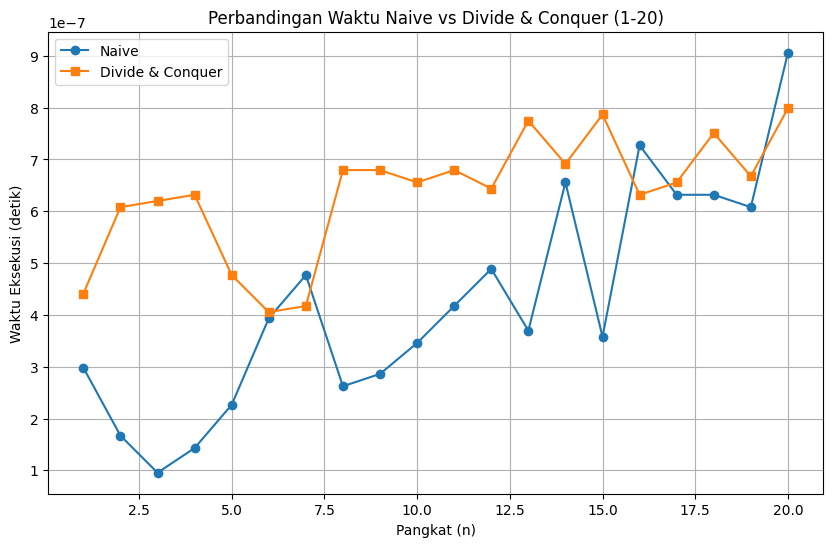

In [44]:
# rata-rata waktu untuk tiap n
avg_times = df.groupby("n")[["waktu_naive", "waktu_dnc"]].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_times.index, avg_times["waktu_naive"], label="Naive", marker="o")
plt.plot(avg_times.index, avg_times["waktu_dnc"], label="Divide & Conquer", marker="s")
plt.xlabel("Pangkat (n)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Naive vs Divide & Conquer (1-20)")
plt.legend()
plt.grid(True)
plt.show()